In [1]:
#Import appropriate libraries.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

Note: Due to having only two working features and drawing simple, common-sense observations, no machine learning models will be used for this simple project.

In [2]:
#Load data from .csv file into a dataframe.
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Display data types
data.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
#Filter Data Columns to the ones that are actually relevant to this sample analysis.
data_filter=data.filter(['SEVERITYCODE','COLLISIONTYPE'], axis=1)
data_filter

,SEVERITYCODE,COLLISIONTYPE
0,2,Angles
1,1,Sideswipe
2,1,Parked Car
3,1,Other
4,2,Angles
...,...,...
194668,2,Head On
194669,1,Rear Ended
194670,2,Left Turn
194671,2,Cycles


In [5]:
#Lets's take a quick peek at what the data looks like.
data_filter.head()

,SEVERITYCODE,COLLISIONTYPE
0,2,Angles
1,1,Sideswipe
2,1,Parked Car
3,1,Other
4,2,Angles


In [6]:
#Let's see an array of the different collision types.
data_filter['COLLISIONTYPE'].unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', nan, 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

In [7]:
#For simplicity, "Other" and "Nan" should be omitted. First convert "Other" to NaN.
data_filter = data_filter.replace('Other', np.nan)
data_filter['COLLISIONTYPE'].unique()

array(['Angles', 'Sideswipe', 'Parked Car', nan, 'Cycles', 'Rear Ended',
       'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'], dtype=object)

In [8]:
#Remove "NaN" values due to their having negligible impact on this sample analysis.
data_filter2 = data_filter.dropna()
data_filter2 = data_filter2.reset_index(drop=True)
data_filter2['COLLISIONTYPE'].unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Cycles', 'Rear Ended',
       'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'], dtype=object)

array([[<AxesSubplot:title={'center':'SEVERITYCODE'}>]], dtype=object)

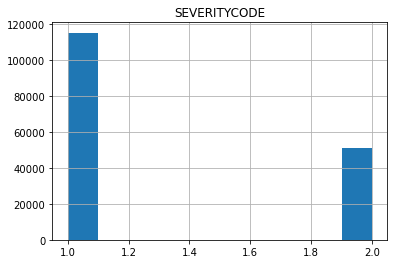

In [9]:
#Now, let's see what we can do with modeling this data.
data_filter2.hist(column='SEVERITYCODE')

At a glance, roughly just under a third of the severity code values are 1 (property damage only) and the rest are of value 2 ("regular" injuries). This means only property damage (1) or regular injuries (2) are reported in this dataset. (For a more extensive analysis, we'll likely need data that includes other severity code type like fatalities.)

In [10]:
#View the dataframe to see the categories.
data_filter2

,SEVERITYCODE,COLLISIONTYPE
0,2,Angles
1,1,Sideswipe
2,1,Parked Car
3,2,Angles
4,1,Angles
...,...,...
166061,2,Head On
166062,1,Rear Ended
166063,2,Left Turn
166064,2,Cycles


In [11]:
#Dataframe at a glance.
data_filter2.head()

,SEVERITYCODE,COLLISIONTYPE
0,2,Angles
1,1,Sideswipe
2,1,Parked Car
3,2,Angles
4,1,Angles


In [12]:
#Generate a weighted average for the dataset to see the relative amounts of property damage vs. injury
grouped = data_filter2.groupby(['COLLISIONTYPE'],as_index=False).mean()
grouped

,COLLISIONTYPE,SEVERITYCODE
0,Angles,1.392917
1,Cycles,1.876085
2,Head On,1.430830
3,Left Turn,1.394877
4,Parked Car,1.055473
5,Pedestrian,1.898305
6,Rear Ended,1.430361
7,Right Turn,1.206022
8,Sideswipe,1.134666


In [13]:
#Swap severtiy code int64 type to type string.
data_filter2['SEVERITYCODE'] = data_filter2['SEVERITYCODE'].apply(str)

In [14]:
#Swap "1" for "Property Damage"
data_filter2['SEVERITYCODE'] = data_filter2['SEVERITYCODE'].replace(['1'],'Property Damage')

In [15]:
#Swap "2" for "Bodily Injury"
data_filter2['SEVERITYCODE'] = data_filter2['SEVERITYCODE'].replace(['2'],'Bodily Injury')

In [16]:
#Confrim object type change
data_filter2.dtypes

SEVERITYCODE     object
COLLISIONTYPE    object
dtype: object

In [17]:
#Confirm Severity Code relabeling
data_filter2.head()

,SEVERITYCODE,COLLISIONTYPE
0,Bodily Injury,Angles
1,Property Damage,Sideswipe
2,Property Damage,Parked Car
3,Bodily Injury,Angles
4,Property Damage,Angles


In [18]:
#Get basic statistics for revised dataframe
data_filter2.describe()

,SEVERITYCODE,COLLISIONTYPE
count,166066,166066
unique,2,9
top,Property Damage,Parked Car
freq,115031,47987


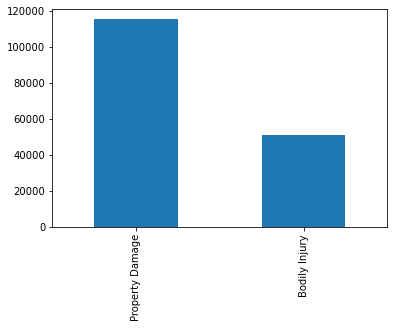

In [19]:
#Bar grapg to plot Types of Damage
data_filter2['SEVERITYCODE'].value_counts().plot(kind='bar');

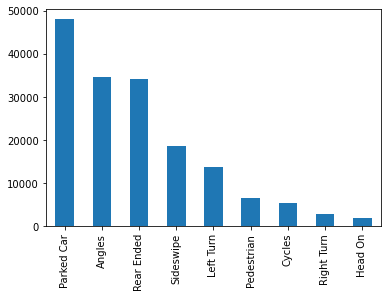

In [20]:
#Bar graph to plot Collision Types in descending order.
data_filter2['COLLISIONTYPE'].value_counts().plot(kind='bar');

<AxesSubplot:xlabel='COLLISIONTYPE'>

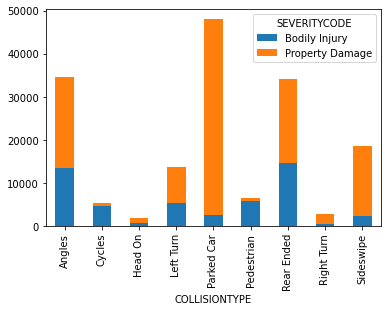

In [21]:
#Combination plot to show both types at once.
data_filter2.groupby(['COLLISIONTYPE', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)